In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st

In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [59]:

df_wk = df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
df_mostRecent = df_wk.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)
df_mostRecent
rating = df_mostRecent[['Emp_ID','Quarterly Rating']]
rating

,Emp_ID,Quarterly Rating
0,2788,2
1,2784,4
2,2781,4
3,2778,1
4,2775,1
...,...,...
2376,136,1
2377,105,1
2378,86,1
2379,70,1


In [3]:
# plot histogram of designationcounts at specific times - get shape of the company

Jan16_df = df.loc[df['MMM-YY']=='2016-01-01',:]
Jan16_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,0,1
28,2016-01-01,13,29,Male,C19,Master,119227,2012-05-28,NaN,1,4,250000,1
54,2016-01-01,16,30,Female,C23,College,52963,2015-11-30,NaN,2,2,346800,1
56,2016-01-01,17,42,Male,C20,Master,51099,2015-03-06,NaN,1,1,100000,2


In [41]:
# plot shape of company Jan 2016
d1_count = []
d2_count =[]
d3_count = []
d4_count = []
d5_count = []
x=[1,2,3,4,5]
y= Jan16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()
y.transpose()

SyntaxError: invalid syntax (2519662989.py, line 12)

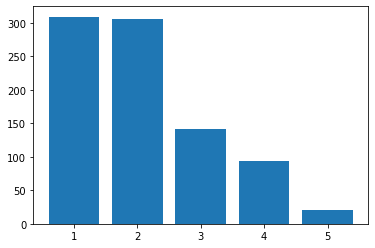

1    309
2    305
3    142
4     94
5     20
Name: Designation, dtype: int64

In [16]:
# plot shape of company Mar 2016
Mar16_df = df.loc[df['MMM-YY']=='2016-03-01',:]
# Mar16_df.head()
x=[1,2,3,4,5]
y= Mar16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()
y.transpose()

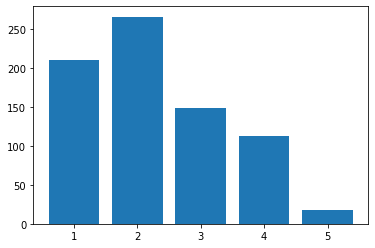

2    266
1    211
3    149
4    113
5     18
Name: Designation, dtype: int64

In [20]:
# plot shape of company July 2016
Jul16_df = df.loc[df['MMM-YY']=='2016-07-01',:]
# Jul16_df.head()
x=[2,1,3,4,5]
y= Jul16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()
y.transpose()

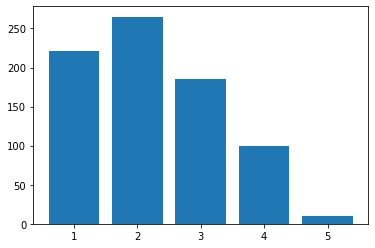

2    265
1    221
3    185
4    100
5     10
Name: Designation, dtype: int64

In [21]:
# plot shape of company Nov 2016
Nov16_df = df.loc[df['MMM-YY']=='2016-11-01',:]
# Nov16_df.head()
x=[2,1,3,4,5]
y= Nov16_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()
y.transpose()

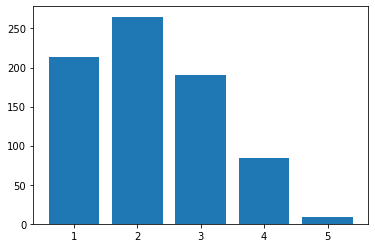

2    265
1    213
3    190
4     84
5      9
Name: Designation, dtype: int64

In [23]:
# plot shape of company Feb 2017
Feb17_df = df.loc[df['MMM-YY']=='2017-02-01',:]
# Feb17_df.head()
x=[2,1,3,4,5]
y= Feb17_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()
y.transpose()

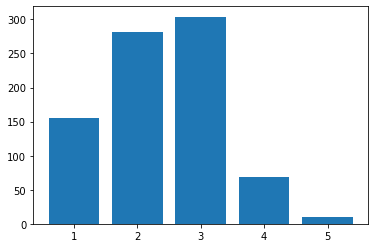

3    304
2    281
1    156
4     68
5     10
Name: Designation, dtype: int64

In [25]:
# plot shape of company Dec 2017
Dec17_df = df.loc[df['MMM-YY']=='2017-12-01',:]
# Dec17_df.head()
x=[3,2,1,4,5]
y= Dec17_df['Designation'].value_counts()
plt.bar(x,y)
plt.show()
y

2    6627
1    5202
3    4826
4    2144
5     305
Name: Designation, dtype: int64


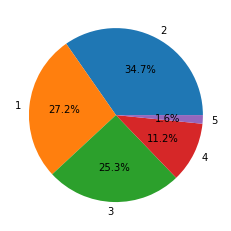

In [54]:
# Findings: 'shape' of company does change. Get % values for presentation
y=df['Designation'].value_counts()
print(y)
x=[2,1,3,4,5]
# plt.bar(x,y)
plt.pie(y,labels=x,autopct="%1.1f%%")
plt.show()

In [30]:
# Does the spread of designations leaving match the shape of the company?
path2 = 'EA_new_df'
new_df = pd.read_csv(path2)
leavers = new_df.loc[new_df['Left_Company']==True,'Current_Designation']
leavers.value_counts()


2    600
1    596
3    337
4     70
5     13
Name: Current_Designation, dtype: int64

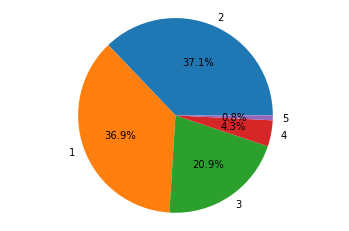

In [31]:
# plot leavers

y = leavers.value_counts()
labels = [2,1,3,4,5]

plt.pie(y,labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.show()


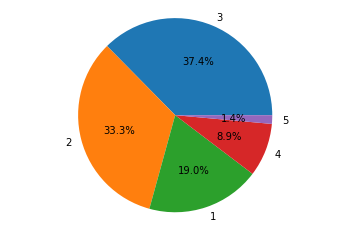

In [33]:
# Plot whole company and/or stayers
alldes = new_df['Current_Designation']
stayers = new_df.loc[new_df['Left_Company']==False,'Current_Designation']
y = stayers.value_counts()
y
labels = [3,2,1,4,5]
plt.pie(y,labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

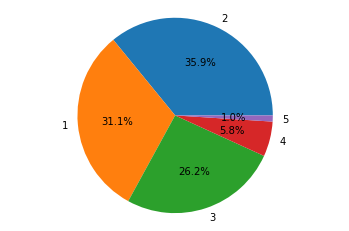

In [35]:


y = alldes.value_counts()
y
labels = [2,1,3,4,5]
plt.pie(y,labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [50]:
# Findings: there is a higher turnover in designation 1 and 2
# Clarify %
new_starters = new_df.loc[new_df['Start_date']>='2016-01-01',:]
new_starters
st = new_starters.loc[new_starters['Left_Company']==True,:]
stg = st.groupby('Current_Designation')
st_tenure = stg['Tenure'].mean()
st_tenure
# print(new_df.dtypes)
# new_df.head()

Current_Designation
1    136.972973
2    131.454006
3    141.471545
4    188.173913
5    396.500000
Name: Tenure, dtype: float64

In [60]:
# show leavers rating at leaving month
# same for 6 months prior to leaving if time permits
new_df = pd.merge(new_df, rating, on='Emp_ID')


,Unnamed: 0,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Left_Company,Start_date,End_date,Current_Designation,Quarterly Rating
0,0,1,2015-12-24,2016-03-11,78,True,2015-12-24,2016-03-11,1,2
1,1,2,2017-11-06,NaN,55,False,2017-11-06,2017-12-31,2,1
2,2,4,2016-12-07,2017-04-27,141,True,2016-12-07,2017-04-27,2,1
3,3,5,2016-01-09,2016-03-07,58,True,2016-01-09,2016-03-07,1,1
4,4,6,2017-07-31,NaN,153,False,2017-07-31,2017-12-31,3,2
...,...,...,...,...,...,...,...,...,...,...
2376,2376,2784,2012-10-15,NaN,1903,False,2012-10-15,2017-12-31,3,4
2377,2377,2785,2017-08-28,2017-10-28,61,True,2017-08-28,2017-10-28,1,1
2378,2378,2786,2015-07-31,2016-09-22,419,True,2015-07-31,2016-09-22,2,1
2379,2379,2787,2015-07-21,2016-06-20,335,True,2015-07-21,2016-06-20,1,1


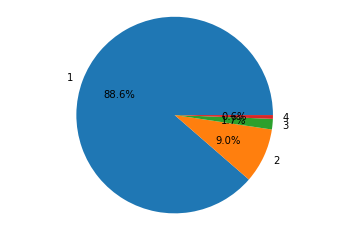

In [62]:
rate_leavers = new_df.loc[new_df['Left_Company']==True,'Quarterly Rating']
y = rate_leavers.value_counts()
labels = [1,2,3,4]
plt.pie(y,labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [13]:


# is there any bias regarding age?
# same business value = same salary. 